모형설정오류의 교정(econometrics3 pg21) - 함수설정 오류의 경우

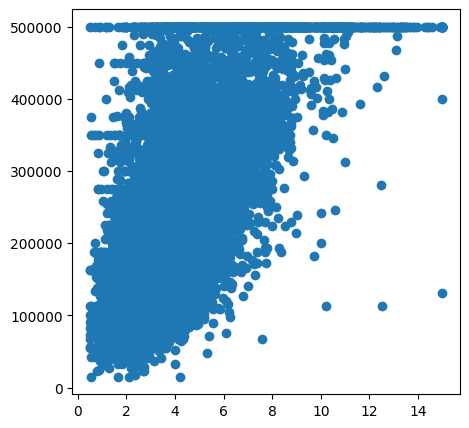

In [1]:
#설명변수가 비선형인 모형
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
data = pd.read_csv('california_housing_train.csv')
Y = data.median_house_value
X = data.median_income

plt.figure(figsize=(5,5))
plt.scatter(x=X, y=Y)

In [2]:
model_nonlinear = sm.OLS(Y, sm.add_constant(pd.concat([X, X**2, X**3], axis=1))).fit()
model_nonlinear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     5469.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:10:36   Log-Likelihood:            -2.1662e+05
No. Observations:               17000   AIC:                         4.332e+05
Df Residuals:                   16996   BIC:                         4.333e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.514e+04   4261.114     17.634      0.000    6.68e+04    8.35e+04
median_income   1.51e+04   2575.340      5.861      0.000       1e+04    2.01e+04
median_income  6050.3056    447.097     13.532      0.000    5173.949    6926.663
median_income  -353.9104     21.819    -16.220      0.000    -396.678    -311.143
==============================================================================
Omnibus:                     3696.377   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8351.749
Skew:                           1.240   Prob(JB):                         0.00
Kurtosis:                       5.375   Cond. No.                     2.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
#로그-로그 모형
import numpy as np
Y_ln = np.log(Y)
X_ln = np.log(X)

log_model = sm.OLS(Y_ln, sm.add_constant(X_ln)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                 1.454e+04
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:10:36   Log-Likelihood:                -9360.2
No. Observations:               17000   AIC:                         1.872e+04
Df Residuals:                   16998   BIC:                         1.874e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.0579      0.009   1213.648      0.000      11.040      11.076
median_income     0.8240      0.007    120.591      0.000       0.811       0.837
==============================================================================
Omnibus:                      466.467   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              788.790
Skew:                           0.246   Prob(JB):                    5.21e-172
Kurtosis:                       3.933   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
#단측 로그 모형 (Y_ln =B + BX + e)
#단측 로그 모형2 (Y = B + BX_ln + e)
#Ex) 설명변수만 자연로그인 경우
model_Xlog = sm.OLS(Y, sm.add_constant(X_ln)).fit()
model_Xlog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                 1.288e+04
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:10:37   Log-Likelihood:            -2.1757e+05
No. Observations:               17000   AIC:                         4.351e+05
Df Residuals:                   16998   BIC:                         4.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5625.7946   1899.216      2.962      0.003    1903.134    9348.455
median_income  1.617e+05   1424.250    113.507      0.000    1.59e+05    1.64e+05
==============================================================================
Omnibus:                     2941.336   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5468.015
Skew:                           1.085   Prob(JB):                         0.00
Kurtosis:                       4.735   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#역함수 형태 모형 (econometrics3 pg.22)
x_inverse = 1/X
model_inverse = sm.OLS(Y, sm.add_constant(x_inverse)).fit()
model_inverse.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     6477.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:10:37   Log-Likelihood:            -2.1962e+05
No. Observations:               17000   AIC:                         4.392e+05
Df Residuals:                   16998   BIC:                         4.393e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.219e+05   1613.001    199.588      0.000    3.19e+05    3.25e+05
median_income -3.561e+05   4424.030    -80.482      0.000   -3.65e+05   -3.47e+05
==============================================================================
Omnibus:                     3481.752   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7068.214
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                       5.000   Cond. No.                         6.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

그래프만 보면 잘 판단이 안될 수 있기 때문에 각 함수형태 생김새의 그래프를 가진 자료들의 산포도를 찍어보고 (Y vs X), 
log-log 모형이나 단측log 모형이나 이런 후보군들을 추리고 여러 모형 만들어본 후 적합한 모형을 선택

내생성 문제: 설명변수와 오차항간에 발생하는 상관관계에 의한 문제
- 설명변수와 오차항간 상관이 없는 경우 -> 외생적 설명변수
- 설명변수와 오차항간 상관이 있는 경우 -> 내생적 설명변수

- 내생성 문제의 해결: 도구변수 (econometrics 3 pg.31)
- 도구변수: 설명변수와는 상관관계가 높으면서 오차항과의 상관은 거의 없는 변수로 내생성 문제가 있을 때 설명변수를 대체할 수 있는 변수를 말함

- 도구변수 선택 방법: 내생성 원인 설명변수와 유사한 특성변수 선택

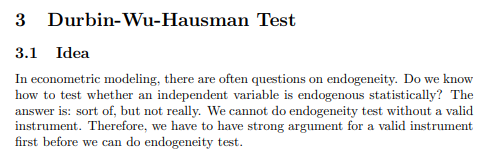

In [2]:
from IPython.display import display, Image
display(Image(filename='images\\94.png'))

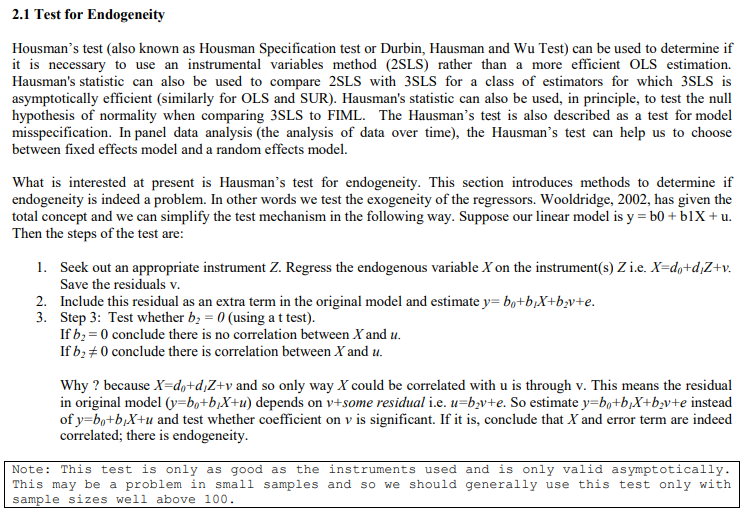

In [3]:
from IPython.display import display, Image
display(Image(filename='images\\95.png'))

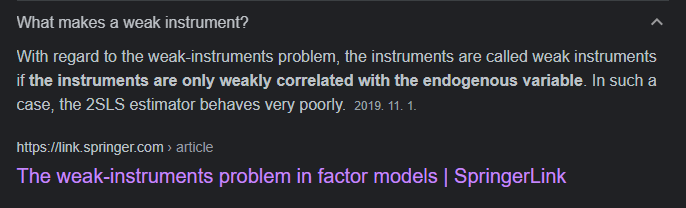

In [4]:
from IPython.display import display, Image
display(Image(filename='images\\96.png'))

In [6]:
#내생성: 설명변수와 오차항간의 상관으로부터 야기되는 회귀계수 추정량의 불일치성 문제
#내생성 문제 해결: 도구변수 추정법
#도구변수: 설명변수와는 상관이 높으면서 오차항과는 상관이 없는 변수

도구변수 만들기 - Durbin의 순위법 (econometrics3 pg 34)

In [7]:
import pandas as pd
import statsmodels.api as sm
data = pd.read_csv('california_housing_train.csv')
data = data[['median_house_value', 'total_bedrooms']]

In [8]:
data.sort_values(by='total_bedrooms', ascending=True, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,median_house_value,total_bedrooms
0,500001.0,1.0
1,137500.0,2.0
2,350000.0,3.0
3,275000.0,3.0
4,250000.0,3.0
...,...,...
16995,103400.0,4952.0
16996,212300.0,4957.0
16997,253900.0,5290.0
16998,366300.0,5471.0


In [9]:
import scipy.stats as ss
data['rank_X'] = ss.rankdata(data['total_bedrooms'])

In [10]:
data

,median_house_value,total_bedrooms,rank_X
0,500001.0,1.0,1.0
1,137500.0,2.0,2.0
2,350000.0,3.0,4.5
3,275000.0,3.0,4.5
4,250000.0,3.0,4.5
...,...,...,...
16995,103400.0,4952.0,16996.0
16996,212300.0,4957.0,16997.0
16997,253900.0,5290.0,16998.0
16998,366300.0,5471.0,16999.0


In [11]:
data[['total_bedrooms', 'rank_X']].corr()

,total_bedrooms,rank_X
total_bedrooms,1.000000,0.791079
rank_X,0.791079,1.000000


In [12]:
ss.rankdata([1,2,2,3,4])

array([1. , 2.5, 2.5, 4. , 5. ])

In [13]:
data.rename(columns={'median_house_value':'Y', 'total_bedrooms':'X', 'rank_X':'Z'}, inplace=True)

In [14]:
data

,Y,X,Z
0,500001.0,1.0,1.0
1,137500.0,2.0,2.0
2,350000.0,3.0,4.5
3,275000.0,3.0,4.5
4,250000.0,3.0,4.5
...,...,...,...
16995,103400.0,4952.0,16996.0
16996,212300.0,4957.0,16997.0
16997,253900.0,5290.0,16998.0
16998,366300.0,5471.0,16999.0


In [15]:
data[['X', 'Z']].corr()

,X,Z
X,1.000000,0.791079
Z,0.791079,1.000000


In [16]:
#Y=bX+e에서 X와 오차항간 내생성이 존재한다고 가정
#durbin의 순위법에 따라 Z를 만든 후 2SLS 적용
#2SLS 방법:
# Z -> X 회귀식으로부터 X_hat을 도출
# 이 X_hat을 가지고 Y를 추정하는 회귀식을 만듦


# https://dodonam.tistory.com/227

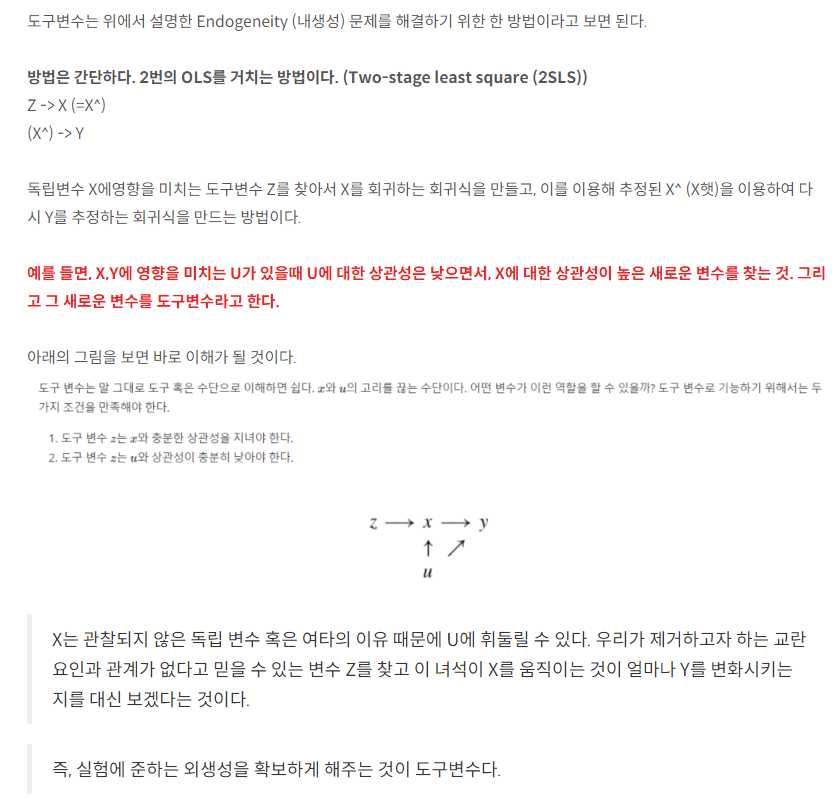

In [17]:
from IPython.display import Image
Image(filename='endogeneity2.png')

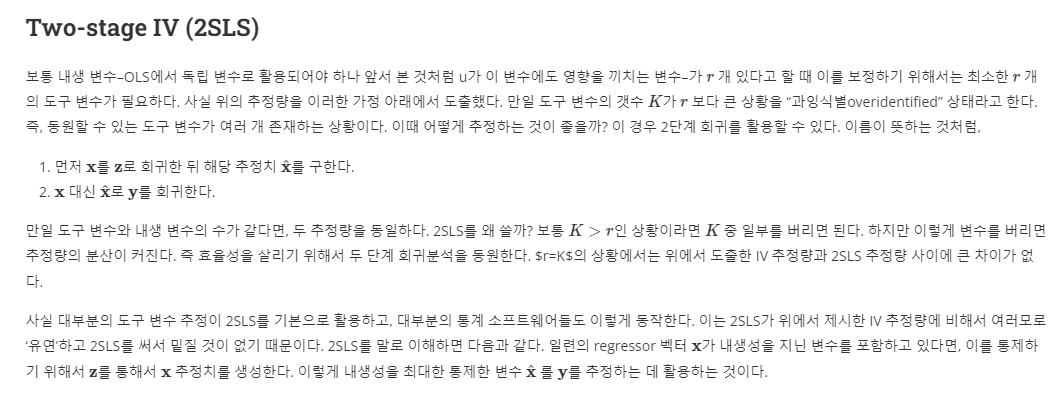

In [18]:
from IPython.display import Image
Image(filename='IV.png')

In [19]:
model_tmp = sm.OLS(data.X, sm.add_constant(data.Z)).fit()

In [20]:
X_hat = model_tmp.predict()

In [21]:
data = pd.concat([data, pd.Series(X_hat)], axis=1)

In [22]:
data.rename(columns={0:'X_hat'}, inplace=True)

In [23]:
data

,Y,X,Z,X_hat
0,500001.0,1.0,1.0,-38.072652
1,137500.0,2.0,2.0,-38.004709
2,350000.0,3.0,4.5,-37.834851
3,275000.0,3.0,4.5,-37.834851
4,250000.0,3.0,4.5,-37.834851
...,...,...,...,...
16995,103400.0,4952.0,16996.0,1116.622526
16996,212300.0,4957.0,16997.0,1116.690469
16997,253900.0,5290.0,16998.0,1116.758413
16998,366300.0,5471.0,16999.0,1116.826356


In [24]:
model_2SLS = sm.OLS(data.Y, sm.add_constant(data.X_hat)).fit()

In [25]:
model_2SLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     47.50
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           5.71e-12
Time:                        15:10:37   Log-Likelihood:            -2.2234e+05
No. Observations:               17000   AIC:                         4.447e+05
Df Residuals:                   16998   BIC:                         4.447e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.974e+05   1689.522    116.836      0.000    1.94e+05    2.01e+05
X_hat         18.3613      2.664      6.892      0.000      13.139      23.584
==============================================================================
Omnibus:                     2041.440   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2854.768
Skew:                           0.989   Prob(JB):                         0.00
Kurtosis:                       3.340   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 내생성 탐지

하우스만 검정 (econometrics3 pg 34)
- X = aZ + W 를 통해 W_hat(잔차) 도출
- Y = b1 + b2X + b3W_hat + u를 통해 b3의 유의성 검정
- b3이 유의하면 설명변수와 오차항간 체계적 관계가 존재하므로 내생성 문제가 발생한 것으로 볼 수 있음

In [26]:
model_tmp = sm.OLS(data.X, sm.add_constant(data.Z)).fit()
data = pd.concat([data, pd.Series(model_tmp.resid)], axis=1)
data.rename(columns={0:'W_hat'}, inplace=True)
data

,Y,X,Z,X_hat,W_hat
0,500001.0,1.0,1.0,-38.072652,39.072652
1,137500.0,2.0,2.0,-38.004709,40.004709
2,350000.0,3.0,4.5,-37.834851,40.834851
3,275000.0,3.0,4.5,-37.834851,40.834851
4,250000.0,3.0,4.5,-37.834851,40.834851
...,...,...,...,...,...
16995,103400.0,4952.0,16996.0,1116.622526,3835.377474
16996,212300.0,4957.0,16997.0,1116.690469,3840.309531
16997,253900.0,5290.0,16998.0,1116.758413,4173.241587
16998,366300.0,5471.0,16999.0,1116.826356,4354.173644


In [27]:
hausman = sm.OLS(data.Y, sm.add_constant(data[['X', 'W_hat']])).fit()
hausman.pvalues

const    0.000000e+00
X        5.707704e-12
W_hat    4.070146e-04
dtype: float64

요약 <br>
내생성 문제: 설명변수와 오차항간의 상관으로부터 야기되는 회귀계수 추정량의 불일치성 문제 <br>
내생성의 탐지: 하우스만 검정 <br>
내생성 문제 해결: 도구변수 추정법 <br>
도구변수: 설명변수와는 상관이 높으면서 오차항과는 상관이 없는 변수

In [28]:
#causes of endogeneity: omission of variables, errors-in-variables, and simultaneous causality

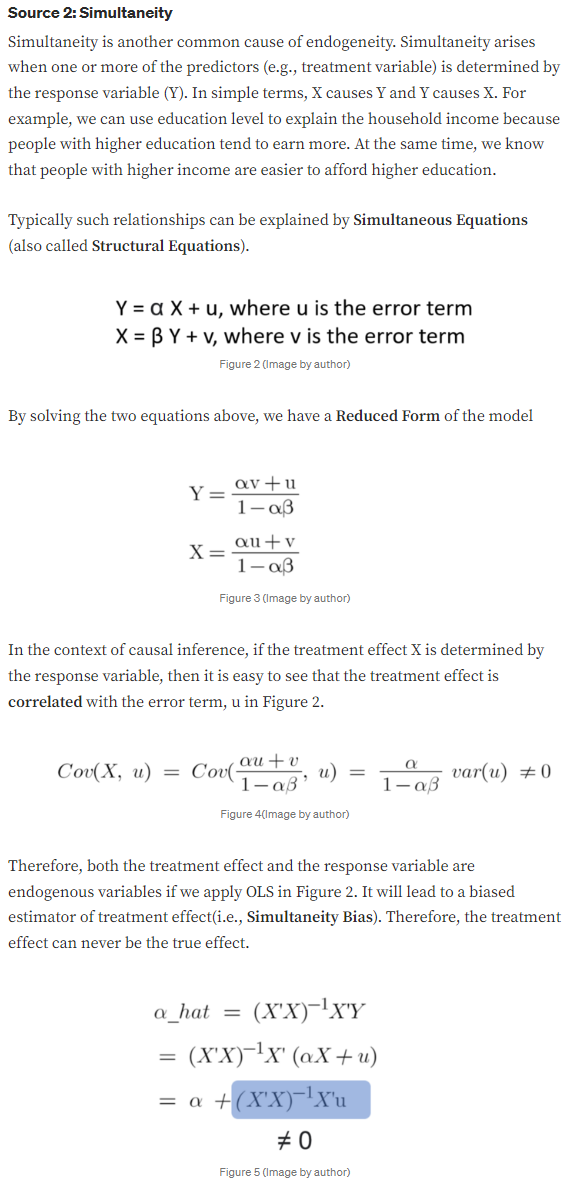

In [29]:
from IPython.display import Image
Image('endogeneity.png')

In [30]:
#also, econometrics4 pg.18 참고 for endogeneity test (hausman)
#also, econometrics4 pg 22,23,24 참고 for 2SLS
#also, econometrics4 pg.27 참고 for IV

# Logit Model (Logistic Regression)

econometrics3 pg44, 45 <br>
- 회귀식의 베타는 설명변수 한 단위 증가에 따른 로그 오즈비를 의미함
- 오즈비 (odds ratio): p/(1-p), 즉 실패확률 분의 성공확률 (성공확률과 실패확률의 비율, 즉 실패확률을 기준으로 본 성공 가능성 정도)
- 로그오즈비: ln(오즈비)
- p-value는 베타(설명변수 한단위 증가에 따른 로그오즈비 변화)의 statistical significance를 의미 (regression의 p-value처럼 마찬가지로 베타의 신뢰성)

In [31]:
# https://quantifyinghealth.com/interpret-logistic-regression-coefficients/ 
# https://lovelydiary.tistory.com/347
# 참고

The logistic regression coefficient β associated with a predictor X is the expected change in log odds of having the outcome per unit change in X. So increasing the predictor by 1 unit (or going from 1 level to the next) multiplies the odds of having the outcome by e**β.

In [32]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
data = pd.read_csv('titanic_train.csv')

In [33]:
data.drop(columns=['PassengerId', 'Pclass', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

In [34]:
data['Sex'] = pd.get_dummies(data.Sex).drop(columns='female')

In [35]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [36]:
Y = data.Survived
X = data.drop(columns='Survived')

In [37]:
logit_model = sm.Logit(Y, sm.add_constant(X)).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.486876
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.2792
Time:                        15:10:38   Log-Likelihood:                -347.63
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 4.040e-56
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5573      0.286      5.442      0.000       0.996       2.118
Sex           -2.5334      0.205    -12.348      0.000      -2.936      -2.131
Age           -0.0215      0.007     -2.996      0.003      -0.036      -0.007
SibSp         -0.4083      0.123     -3.330      0.001      -0.649      -0.168
Parch         -0.2325      0.117     -1.982      0.048      -0.462      -0.003
Fare           0.0172      0.003      5.487      0.000       0.011       0.023
==============================================================================
"""

In [38]:
#위에서 coef(베타)는 로그오즈비임
#p-value는 각 coef가 유의함을 말해줌

실제 오즈비(로그오즈비가 아닌)를 확인하기 위해서는:

In [39]:
logit_model.params

const    1.557319
Sex     -2.533418
Age     -0.021514
SibSp   -0.408306
Parch   -0.232515
Fare     0.017247
dtype: float64

In [40]:
#오즈비
np.exp(logit_model.params)
#Fare의 경우 오즈가 1.01, 즉 살 확률이 죽을 확률의 1.01배
#만약 Fare의 오즈가 2라고 치면 살확률이 죽을확률의 2배라는 것을 보아 Fare가 종속변수인 살아남는 여부에 미치는 영향이 크다고 볼 수 있음

const    4.746078
Sex      0.079387
Age      0.978715
SibSp    0.664775
Parch    0.792538
Fare     1.017396
dtype: float64

In [41]:
#prediction
logit_model.predict([4.746078,1,30,9,3,10])

array([0.50311791])

In [42]:
#McFadden's pseudo-R-squared
logit_model.prsquared

0.27916350520197475

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 

In [44]:
logitModel = LogisticRegression()
logitModel.fit(X, Y)
yhat = logitModel.predict(X)
print(accuracy_score(Y, yhat)) #올바르게 예측된 데이터의 수를 전체 데이터의 수로 나눈 값
print(precision_score(Y, yhat)) #positive로 예측한 전체 건수에서 옳게 예측한 건수의 비율
print(recall_score(Y, yhat)) #실제 positive인 전체 건수에서 옳게 예측한 건수의 비율
print(f1_score(Y, yhat)) #precision과 recall의 균형을 나타내는 수치


0.7801120448179272
0.7567567567567568
0.6758620689655173
0.7140255009107468


In [45]:
confusion_matrix(Y, yhat)

array([[361,  63],
       [ 94, 196]], dtype=int64)

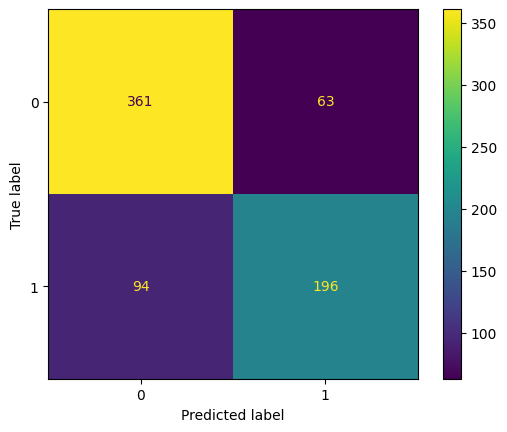

In [46]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y, yhat)).plot()

In [47]:
print("accuracy: ", (196 + 361)/(361+63+94+196))
print("precision: ", 196/(63 + 196))
precision = 196/(63 + 196)
print("recall: ", 196/(94+196))
recall = 196/(94+196)
print("f1 score(precision과 recall의 조화평균): ", 2* (precision*recall) / (precision + recall) )

accuracy:  0.7801120448179272
precision:  0.7567567567567568
recall:  0.6758620689655173
f1 score(precision과 recall의 조화평균):  0.7140255009107468


# Probit 모형: 누적정규분포를 이용한 이항종속변수 모형

In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
data = pd.read_csv('titanic_train.csv')

In [49]:
data.drop(columns=['PassengerId', 'Pclass', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

In [50]:
data['Sex'] = pd.get_dummies(data.Sex).drop(columns='female')

In [51]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [52]:
Y = data.Survived
X = data.drop(columns='Survived')

In [53]:
probit_model = sm.Probit(Y, sm.add_constant(X)).fit()
probit_model.summary()

Optimization terminated successfully.
         Current function value: 0.486554
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                         Probit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.2796
Time:                        15:10:38   Log-Likelihood:                -347.40
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 3.219e-56
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9327      0.162      5.747      0.000       0.615       1.251
Sex           -1.5374      0.118    -13.070      0.000      -1.768      -1.307
Age           -0.0122      0.004     -3.030      0.002      -0.020      -0.004
SibSp         -0.2317      0.070     -3.303      0.001      -0.369      -0.094
Parch         -0.1376      0.070     -1.963      0.050      -0.275      -0.000
Fare           0.0097      0.002      5.978      0.000       0.007       0.013
==============================================================================
"""

In [54]:
probit_model.prsquared

0.2796398266297352

In [55]:
# Probit coefficients are rather in a class by themselves, and their meaning is difficult to put into words. The probit model is perhaps best thought of as modeling a latent outcome y* = b0 + b1x1 + b2x2 + ... + bnxn + error, where the error term has a standard normal distribution, and the observed outcome y is 1 if y* > 0 and 0 otherwise. The coefficients then are marginal effects of the x's on this latent outcome y*.

# In some respects, probit models are similar to logistic models. The latter can also be thought of as models of a latent outcome y* = b0 + b1x1 + b2x2 + ... + bnxn + error. But this time the error distribution is the standard logistic distribution, instead of the normal. These coefficients, however, are more easily understood as log odds ratios , rather than as marginal effects on y*. Unfortunately, there is nothing analogous to log odds ratios for the interpretation of probit coefficients as far as I am aware.

# Now, probing more deeply into the similarity of the logistic and probit models, it is worth noting that the normal and logistic distributions have very similar shapes: when similarly scaled, their graphs look quite similar to the eye and one has to get far into the tails to find much difference between them. The variance of the logistic distribution is (pi^2)/3, whereas that of the standard normal distribution is 1. Given this, it is commonly noted that probit and logistic regressions of the same data tend to lead to the same substantive conclusions. (And, in fact, the preference for one over the other is usually based on historical preferences by the discipline rather than anything statistical or substantive.) Another consequence of the similarity (up to a scale factor) of these distributions is that in general, the logistic regression coefficient will usually be approximately equal to the probit regression coefficient * pi/sqrt(3) [which is approximatey 1.82].

# For those who have grown comfortable working with logistic regression models and (log) odds ratios, when first approaching a probit regression output, it is sometimes helpful to mentally approximately multiply the coefficients by 1.82 to get a "ball park estimate" of what the corresponding results from a logistic regression would probably be close to.

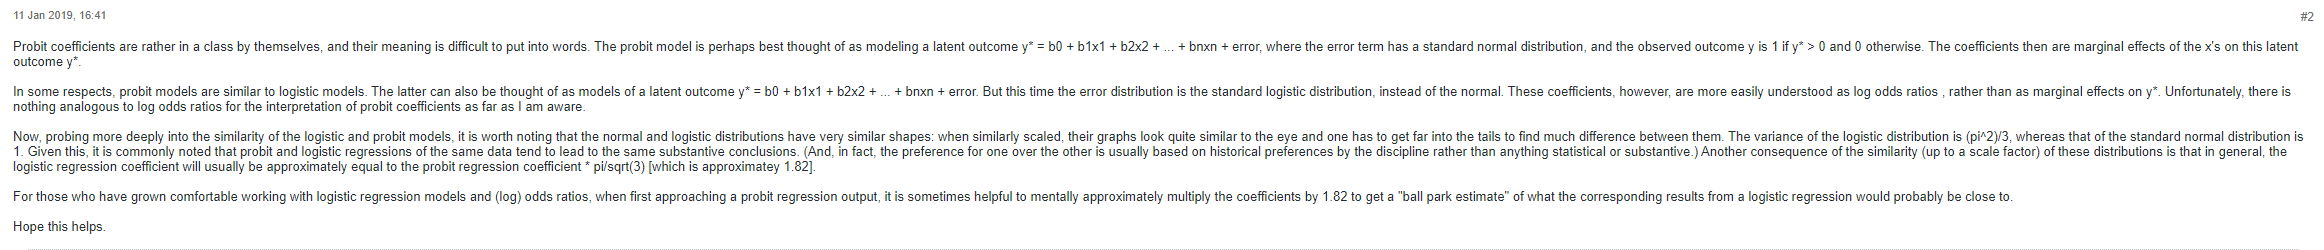

In [2]:
from IPython.display import Image
Image('probit.png')

# Tobit 모형 (중도절단)

In [56]:
# pip install py4etrics

In [57]:
import wooldridge

In [58]:
import pandas as pd
from py4etrics.tobit import Tobit

In [59]:
mroz = wooldridge.data('mroz')

(array([372.,  40.,  35.,  30.,  42.,  37.,  49.,  67.,  55.,   8.,   7.,
          1.,   4.,   1.,   3.,   0.,   0.,   1.,   0.,   1.]),
 array([   0. ,  247.5,  495. ,  742.5,  990. , 1237.5, 1485. , 1732.5,
        1980. , 2227.5, 2475. , 2722.5, 2970. , 3217.5, 3465. , 3712.5,
        3960. , 4207.5, 4455. , 4702.5, 4950. ]),
 <BarContainer object of 20 artists>)

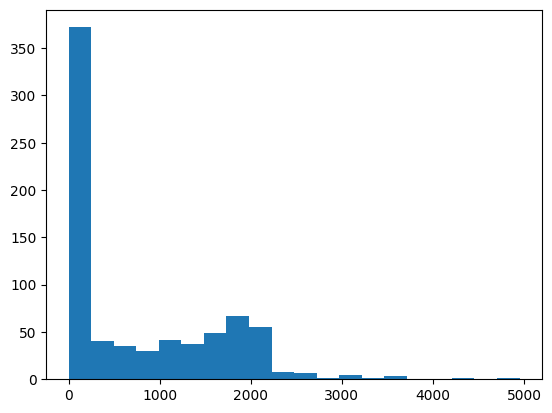

In [60]:
import matplotlib.pyplot as plt
plt.hist(mroz['hours'], bins=20)

In [61]:
# 여성이 노동 시장에 참여할지 여부에 따라,는 양수 값 0을 취합니다. 
# 즉, 0가 하한이 된다. 상한의 예로 인기 가수의 콘서트 티켓을 들 수 있다. 
# 티켓수는 한정되어 있어 품절되었을 경우의 수요는 상한을 상회한다. 

# 여성의 노동공급 모델을 생각하고 공급량 hours을 피설명변수로 한다. 
# 특히 hours하가가0 하한이기 때문에 Tobit모델이 타당하다고 생각된다. 
# 노동시간 hours을 나타내면 0많은 관측치가 있는 것을 알 수 있다.

In [62]:
#left-centored (하단 절단 데이터, 즉 왼쪽이 절단된 데이터)
left = 0
censor = mroz['hours'].apply(lambda x: -1 if x==left else 0)

In [63]:
pd.Series(censor).value_counts()
#no. of left-censored observations: 325 (-1로 표기됨)

 0    428
-1    325
Name: hours, dtype: int64

In [64]:
len(mroz[mroz['hours']==0])

325

In [65]:
help(Tobit)

Help on class Tobit in module py4etrics.tobit:

class Tobit(py4etrics.base_for_models.GenericLikelihoodModel_TobitTruncreg)
 |  Tobit(endog, exog, cens, left=None, right=None, **kwds)
 |  
 |  Create a Seires or array (to be used for "<censor>" below)
 |         -1: left-censored
 |          0: uncensored
 |          1: right-censored
 |  
 |  Method 1:
 |  Tobit(endog, exog, cens=<censor>, left=<0>, right=<0>).fit()
 |  endog = dependent variable
 |  exog = independent variable (add constant if needed)
 |  cens = see above
 |  left = the threshold value for left-censoring (default:0)
 |      　　(This becomes effective only if -1 is set in <censor>)
 |  right = the threshold value for right-censoring (default:0)
 |      　　(This becomes effective only if 1 is set in <censor>)
 |        
 |  Method 2:
 |  formula = 'y ~ 1 + x'
 |  Tobit.from_formula(formula, cens=<censor>, left=<0>, right=<0>, data=<DATA>).fit()
 |  
 |  Method resolution order:
 |      Tobit
 |      py4etrics.base_for_mo

In [66]:
#help(Tobit): censor 정의 방법

#  |  Create a Seires or array (to be used for "<censor>" below)
#  |         -1: left-censored
#  |          0: uncensored
#  |          1: right-censored


#  |  left = the threshold value for left-censoring (default:0)
#  |      　　(This becomes effective only if -1 is set in <censor>)

In [67]:
len(censor)

753

In [68]:
len(mroz)

753

In [69]:
#formula에 '1 +' 들어가는건 원래 이 모듈(py4etrics)에서 그렇게 formula에 들어감
formula = 'hours ~ 1 + nwifeinc + educ + exper + expersq + age + kidslt6 + kidsge6'

res_tobit = Tobit.from_formula(formula,cens=censor,left=0,data=mroz).fit()

print(res_tobit.summary())

Optimization terminated successfully.
         Current function value: 5.071839
         Iterations: 2447
         Function evaluations: 3576
                              Tobit Regression Results                             
Dep. Variable:                       hours   Pseudo R-squ:                    0.034
Method:                 Maximum Likelihood   Log-Likelihood:                -3819.1
No. Observations:                      753   LL-Null:                       -3954.9
No. Uncensored Obs:                    428   LL-Ratio:                        271.6
No. Left-censored Obs:                 325   LLR p-value:                     0.000
No. Right-censored Obs:                  0   AIC:                            7654.2
Df Residuals:                          745   BIC:                            7691.2
Df Model:                                7   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

In [70]:
# 계수의 해석은 OLS와 동일하게 행한다. 
# 예를 들어 educ의 추정치는 약 80이므로 교육연수가 1년 늘어나면 평균적으로 노동시간이 연간 80시간 증가하는 것을 나타내고 있다. 
# 또는Log(Sigma) 절단 회귀 모델의 경우의 해석과 동일하다.

In [71]:
#dir()나 see()를 사용함으로써 속성과 메소드를 확인할 수 있다.
from see import see
see(res_tobit)

c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


    <                <=               ==               !=               >
    >=               dir()            hash()           help()           repr()
    str()            .aic             .bic             .bootstrap()     .bse
    .bsejac          .bsejhj          .conf_int()      .cov_kwds
    .cov_params()    .cov_type        .covjac          .covjhj
    .df_model        .df_modelwc      .df_resid        .endog           .exog
    .f_test()        .fitted_endog    .fittedvalues    .get_nlfun()     .hessv
    .initialize()    .k_constant      .llf             .llnull          .llr
    .llr_pvalue      .load()          .mle_retvals     .mle_settings    .model
    .nobs            .normalized_cov_params            .obs
    .params          .predict()       .prsquared       .pvalues
    .remove_data()                    .resid           .result_null
    .save()          .scale           .score_obsv      .set_null_options()
    .summary()       .t_test()        .t_test_pairwise()
    .

In [72]:
# see(probit_model)

토빗모형의 검정

Wald 검정 (also, econometrics3 pg58 참고)

In [73]:
# Wald 검정의 예 1

# H0: 상수항 이외의 모든 슬로프 계수는 0
# H1: 적어도 하나의 계수는 0이 아닙니다.

# Wald 검정의 예 2

# H0: educ+abilexper
# H1: educ+abilexper
# 다음의 방법으로 행한다.

#1. 제약 표현식을 문자열로 설정:educ+abil=exper

#2. 추정 결과의 메소드 wald_test에 제약식을 인수로서 실행한다.

In [74]:
# #실제 예시:
# H0:exper = expersq = 0 & kidslt6 = kidsge6
# H1: H0 성립하지 않음
res_tobit.wald_test('exper=expersq=0, kidslt6=kidsge6').summary()

'<Wald test (chi2): statistic=[[199.24958606]], p-value=6.127797075907377e-43, df_denom=3>'

In [75]:
# p값은 매우 낮기 때문에 1%유의 수준에서도 귀무 가설을 기각할 수 있다.

In [76]:
res_tobit.wald_test('nwifeinc=educ=exper=expersq=age=kidslt6=kidsge6=Log(Sigma)=0').summary()

'<Wald test (chi2): statistic=[[37433.07052102]], p-value=0.0, df_denom=8>'

In [77]:
res_tobit.wald_test('Intercept=nwifeinc=educ=exper=expersq=age=kidslt6=kidsge6=Log(Sigma)=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[43582.04619628]], p-value=0.0, df_denom=9>

In [78]:
res_tobit.wald_test('nwifeinc=0').summary()

'<Wald test (chi2): statistic=[[3.90729212]], p-value=0.04807700323333447, df_denom=1>'

In [79]:
res_tobit.wald_test('kidsge6=0').summary()

'<Wald test (chi2): statistic=[[0.17616246]], p-value=0.6746921162240728, df_denom=1>'

In [80]:
res_tobit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Tobit Regression Results                             
===================================================================================
Dep. Variable:                       hours   Pseudo R-squ:                    0.034
Method:                 Maximum Likelihood   Log-Likelihood:                -3819.1
No. Observations:                      753   LL-Null:                       -3954.9
No. Uncensored Obs:                    428   LL-Ratio:                        271.6
No. Left-censored Obs:                 325   LLR p-value:                     0.000
No. Right-censored Obs:                  0   AIC:                            7654.2
Df Residuals:                          745   BIC:                            7691.2
Df Model:                                7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    965.3052    446.433      2.162      0.031      90.312    1840.299
nwifeinc      -8.8142      4.459     -1.977      0.048     -17.554      -0.075
educ          80.6456     21.583      3.736      0.000      38.343     122.948
exper        131.5643     17.279      7.614      0.000      97.697     165.431
expersq       -1.8642      0.538     -3.467      0.001      -2.918      -0.810
age          -54.4050      7.418     -7.334      0.000     -68.945     -39.865
kidslt6     -894.0219    111.878     -7.991      0.000   -1113.299    -674.745
kidsge6      -16.2180     38.640     -0.420      0.675     -91.952      59.516
Log(Sigma)     7.0229      0.037    189.514      0.000       6.950       7.096
==============================================================================
"""

In [81]:
res_tobit.llr

271.5944363746903

In [82]:
res_tobit.llr_pvalue

6.961102962973072e-55

In [83]:
res_tobit.prsquared

0.034336519390664955

In [84]:
# 제한 종속 변수 (Limited Dependent Variables; LDV)는 설명 변수가 사용할 수있는 값이 크게 제한되는 경우를 의미합니다. Logit모두Probit 제한 종속 변수의 예이며, 설명 변수는로 제한됩니다. 이 장에서는 다른 유형의 제한 종속 변수를 고려합니다.

# 데이터의 특성상 두 가지로 나눌 수 있습니다.

# 1. 절단 데이터(Truncated Data)
# 특정 데이터가 표본에 포함되어 있지 않습니다.
# 예 : 2018 년도 「환경 친화적 인 기업 행동 조사」의 조사 대상 기업은 종업원 수 500 명 이상으로되어 있으며 500 명 미만의 기업은 포함되어 있지 않습니다.

# 2. 중단 데이터(Censored Data)
#   1. 끝점 해의 경우
#       모금의 금액의 예：모금하지 않는 경우는 0엔이지만, 모금하는 사람의 액수는 양의 값을 취한다. (아래로부터의 중단 데이터)
#   2. 데이터 제약의 경우
#       소득조사의 예：X만엔에서 Y만엔과 같이 카테고리로 정리하는 경우가 통상이며, 최고액 카테고리는 Z만엔 이상이 된다. 이 경우, Z만엔 이상의 소득은 모두 Z만엔이 된다. (위로부터의 중단 데이터)


# (댓글) 다음과 같이 불린다
# 하단에서 의 중단 데이터 = 왼쪽에서 의 차단 데이터 (left-censored)
# 위에서 의 중단 데이터 = 오른쪽에서 의 차단 데이터(right-censored)

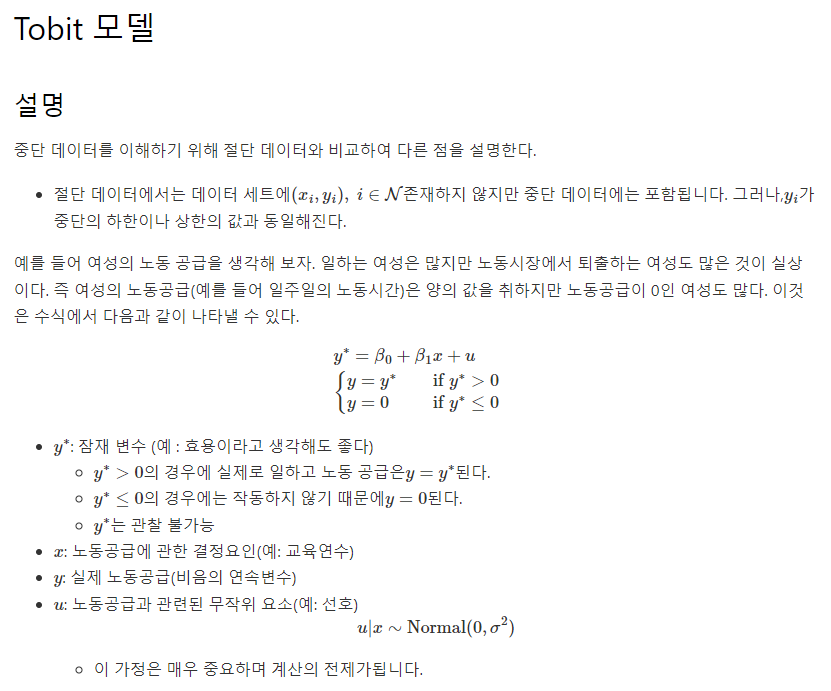

In [85]:
from IPython.display import Image
Image(filename='tobit.png')